# Caminos Más Cortos

En este caso, queremos representar las intersecciones de los caminos de una ciudad mediante vértices de un multi-grafo dirigido ponderado. La ponderación o peso de la arista corresponde al largo del segmento, por lo tanto podemos utilizar el algoritmo Dijsktra para calcular el costo de un camino entre dos puntos. 

<Figure size 432x288 with 0 Axes>

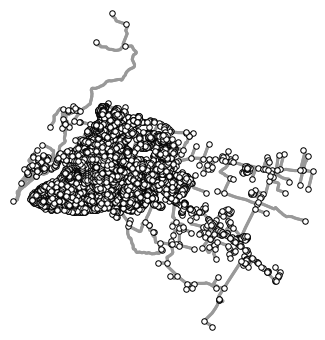

0
n                                                                           8741
m                                                                          23156
k_avg                                                                    5.29825
intersection_count                                                          7515
streets_per_node_avg                                                     2.92426
streets_per_node_counts        {0: 0, 1: 1226, 2: 27, 3: 5699, 4: 1763, 5: 24...
streets_per_node_proportion    {0: 0.0, 1: 0.14025855165312892, 2: 0.00308889...
edge_length_total                                                    1.91201e+06
edge_length_avg                                                          82.5707
street_length_total                                                  1.05608e+06
street_length_avg                                                        82.5446
street_segments_count                                                      12794
node_density_km                                                             None
intersection_density_km                                                     None
edge_density_km                                                             None
street_density_km                                                           None
circuity_avg                                                             1.05389
self_loop_proportion                                                  0.00272068
clean_intersection_count                                                    None
clean_intersection_density_km                                               None

In [4]:
import osmnx as ox
import networkx as nx
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

ox.config(log_file=True, log_console=True, use_cache=True)
G=ox.graph_from_place('Talca,Chile',network_type='bike', simplify=True)
ox.save_graphml(G, filename='talca_ciclovias.graphml')
plt.figure()
ox.plot_graph(ox.project_graph(G),node_color='w', node_edgecolor='k', node_size=30,node_zorder=3, edge_linewidth=3)
plt.show()

stats=ox.basic_stats(G)
df=pd.DataFrame(pd.Series(stats)).T
display(df.T) 


In [7]:
import networkx as nx
import pandas as pd
import numpy as np

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

def get_nearest_node(G,point):
    node_distances={}
    for g in G.nodes():
        dist=haversine(np.float(G.node[g]['y']),np.float(G.node[g]['x']),point[0],point[1])
        node_distances.update({g:dist})
    lookup_list = pd.Series(node_distances)
    min_dist= min(node_distances.values())
    return lookup_list[lookup_list.values == min_dist].index[0]

G=nx.read_graphml('data/talca_ciclovias.graphml')
print(nx.info(G))
origin_point = (-35.434415,-71.620053)
destination_point = (-35.425901, -71.666645)

origin_node=get_nearest_node(G,origin_point)
destination_node=get_nearest_node(G,destination_point)
print('Nodo Inicio : ',G.node[origin_node])
print('Nodo Final : ',G.node[destination_node])
#ox_origin_node = ox.get_nearest_node(G, origin_point)
#ox_destination_node = ox.get_nearest_node(G, destination_point)
#print ox_origin_node
#print ox_destination_node


Name: Talca,Chile
Type: MultiDiGraph
Number of nodes: 8741
Number of edges: 23156
Average in degree:   2.6491
Average out degree:   2.6491


AttributeError: 'MultiDiGraph' object has no attribute 'node'

In [8]:
import json
from shapely.geometry import LineString
from shapely.wkt import loads 
from heapq import heappush,heappop

def plot_coords(ax, x, y, color='#FF0000', zorder=1):
    ax.plot(np.float(x), np.float(y), 'o', color=color, zorder=zorder)

def plot_line(ax, ob, color='#999999'):
    line=loads(ob)
    x, y = line.xy
    ax.plot(x, y, color=color, linewidth=3, solid_capstyle='round', zorder=1)

open=[]
print('Nodo Inicio : ',G.node[origin_node])
fig = plt.figure(1, dpi=90)
ax = fig.add_subplot(121)
for p,n,data in G.out_edges(origin_node,True):
    line=data['geometry']
    plot_line(ax, line)
    priority=np.float(data['length'])
    print('vecino : ',(p,G.node[n],priority))
    heappush(open, (priority, n))
    plot_coords(ax, G.node[n]['x'], G.node[n]['y'])
plot_coords(ax, G.node[origin_node]['x'], G.node[origin_node]['y'],color='#000000')

ax = fig.add_subplot(122)
p,v=heappop(open)
for p,n,data in G.out_edges(v,True):
    if(data.has_key('geometry')):
        line=data['geometry']
        plot_line(ax, line)
    priority=np.float(data['length'])
    print('vecino : ',(p,G.node[n],priority))
    plot_coords(ax, G.node[n]['x'], G.node[n]['y'])
plot_coords(ax, G.node[origin_node]['x'], G.node[origin_node]['y'],color='#000000')
    

AttributeError: 'MultiDiGraph' object has no attribute 'node'